#Ecuación Korteweg-de-Vries(KdV)


La ecuación KdV es una ecuación diferencial en derivadas parciales que sirve como modelo de, entre otras cosas, aguas poco profundas. Fue por primera vez introducida por Boussinesq en 1877 como una nota y redescubierta por Diederik Korteweg y Gustav de Vries en 1895. Esta está dada por la expresión,

$$ \partial_t u + u u_x + \beta \, u_{xxx} = 0 $$







# Busco conservaciones teóricamente.

Parto de la fórmula de KdV (utilizando la regla de la cadena en el segundo término para reescribirlo de una forma más conveniente):
$$ \frac{∂ u}{∂ t} = - [\frac{∂ }{∂ x}(\frac{u^2}{2}) + β \frac{∂^3 u}{∂ x^3}]$$

Ahora integro en ambos lados en x:

$$ \frac{∂}{∂ t} [u ⋅ dx] = - \frac{∂ }{∂ x} [\frac{u^2}{2} + β \frac{∂^2 u}{∂ x^2}] dx$$

Lo cual del lado derecho llegamos a la expresión del momento derivado en el tiempo:

$$ \frac{∂ P}{∂ t} = - \frac{∂ }{∂ x} [\frac{u^2}{2} + β \frac{∂^2 u}{∂ x^2}] dx$$

Pero si integramos, es decir que evaluamos en el contorno el corchete de la derecha, llegaremos a su nulidad (debido a periocidad) y por lo tanto a que P es constante:

$$ \frac{∂ P}{∂ t} = 0$$


Para llegar a la conservación de la energía se debe hacer un otro cambio a la primer fórmula expresada en este inciso. Este cambio es el siguiente:

$$ \frac{∂}{∂ t} (\frac{u^2}{2})  =   (u ⋅ \frac{∂u}{∂ t})$$

Por lo tanto mi nuevo Kdv queda (si multiplico ambos lados por u):

$$ \frac{∂}{∂ t} (\frac{u^2}{2})  = - u ⋅ [\frac{∂ }{∂ x}(\frac{u^2}{2}) + β \frac{∂^3 u}{∂ x^3}]$$

Esta expresión la puedo multiplicar por dx py utilizando la expresión de la energia llego a:

$$ \frac{1}{2} \cdot \frac{∂E}{∂ t}   = - u ⋅ \frac{∂ }{∂ x}[(\frac{u^2}{2}) + β \frac{∂^2 u}{∂ x^2}] dx$$

Lo cual nos lleva al mismo caso que en la conservación de P, el lado derecho de la expresión será nula por periodicidad, llevando a que:

$$  \frac{∂E}{∂ t}   = 0$$


# Busco su comportamiento de ondas teóricamente.

La relación de dispersión de KdV la puedo obtener linealizando (no tengo el segundo término en cuenta) y utilizo $u = A ⋅ sen(kx-ωt)$. Resulta en:
$$ - ω A \cdot cos(kx-\omega t) - β A k ⋅cos(kx - ωt) = 0 $$

Sacando todo lo que sea factor común podemos reducir la anterior expresión a lo siguiente:

$$ ω = - β \cdot k^3$$

Esto último no sólo nos da la relación de dispersión, sino que además nos indica que son ondas dispersivas.

# Ondas viajeras (teoría)

Para encontrar ondas viajeras y sus respectivos régimenes voy a tener que empezar utilizando lo siguiente (debido a cambio de variable u(y)=u(x-vt)):

$$ \frac{∂ u}{∂ t} = \frac{∂u}{∂y} ⋅ \frac{∂y}{∂y}= -v · \frac{∂ u}{∂ y}$$

Teniendo esto último amano podemos reemplazar en nuestro KdV con la intención de llegar a una expresión de potencial:

$$ \beta \cdot \frac{∂^3 u}{∂ y^3} = v ⋅ \frac{∂ u}{∂ y} - u ⋅ \frac{∂ u}{∂ y}$$

Integro en "y" una vez:

$$ \beta \cdot \frac{∂^2 u}{∂ y^2} = v ⋅ u - \frac{u^2}{2}$$

Lo cual del lado izquierdo tenemos la expresión para $-\frac{dV}{du}$. Integrando llegamos a lo siguiente:

$$ V(u) = \frac{u^3}{6} - v ⋅ \frac{u^2}{2} + C$$

In [ ]:
### PLOTEO DE FORMA DE POTENCIAL ###

import numpy as np
import matplotlib.pyplot as plt

U = np.linspace(-50,150)
v = 30

def V(U, v):
  V = (U**(3) / 6) - v * U**(2) / 2 #Tomo C = 0
  return V

V_ = V(U,v)



plt.plot(U, V_, c = "purple")
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1, label='Energia 0')
plt.text(0.5, 8000, r'$E_0$', fontsize=10, color='black')

min_U_positive = U[U > 0][np.argmin(V_[U > 0])]
min_V = np.min(V_[U > 0])
plt.axvline(min_U_positive, color='green', label=f'Energía 1')
plt.axhline(min_V, color='green')
plt.text(60, -30000, r'$E_1$', fontsize=10, color='black')

plt.fill_between(U, min_V, color='grey', alpha=0.3, label='Región de Energía 2')

plt.xlabel('u')
plt.ylabel('V')
plt.title('Gráfica de potencial V(U)')
plt.grid()
plt.legend()
plt.show()

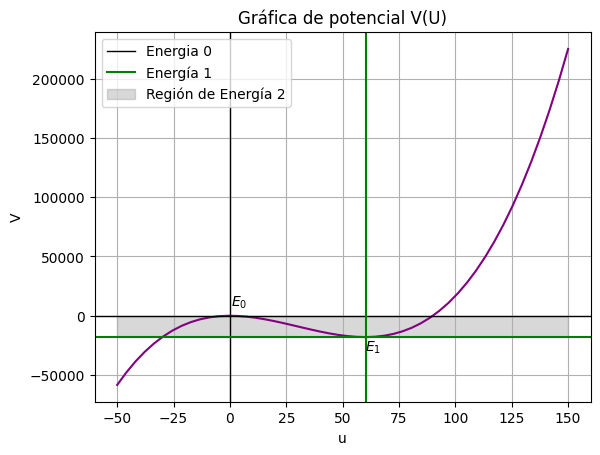

Del anterior gráfico del potencial V(U) podemos obtener información sobre tres regímenes de movimiento. \\
El primero siendo con E = $E_0$, en el cual se verá un solitón fijo. Para E = $E_1$ se tiene un mínimo de potencial y por lo tanto una sóla energía compatible, por lo tanto tendremos "órbitas circulares" es decir ondas periódicas. \\
Ahora, entre $E_0$ > E > $E_1$, tendremos "órbitas cerradas". En otras palabras, soluciones finitas o trenes de onda. \\
Finalmente, para E > $E_0$, tendremos un sólo valor de potencial posible por lo tanto llegamos a "ondas abiertas".

# Integro computacionalmente.

Pseudo Espectral

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
beta = 0

N = 128
dt = .001
step = N

x = np.linspace(0,2*np.pi,N,endpoint=True) # Coordenada espacial en [0,2*pi]
t = np.arange(step)*dt                      # Tiempo
k = np.arange(0,N/2+1)

u = np.sin(x*a)

In [ ]:
def evol(u,k,beta,N,dt):
    # Evoluciona en el tiempo la PDE usando el método pseudoespectral y Runge-Kutta de segundo orden
    f  = np.fft.rfft(u)     #vaya al espacio de Fourier
    ft = f
    for ord in [2,1]:       # Bucle para el Runge-Kutta
        D   = dt/ord                 #D está siendo iterado entre D = {dt/2, dt/1}
        fux = compute_advection(f,k,N)      # Calculo la advección osea U*Ux
        fuxxx = f*beta*((1j*k)**3)        #derivada de la advección en x, baja el argumento de la exponencial a la tercer potencia
        fev = (-1) * fux - fuxxx     #evolución con euler
        f = ft + D * fev
        f[int(N/3):] = 0    # Dealiasing (eliminemos modos espúreos!)
    out = np.fft.irfft(f)  #Vuelva del espacio de Fourier
    return out

def compute_advection(f,k,N):
    # Calcula v*vx usando el método pseudoespectral y devuelve el resultado en el espacio Fourier
    fx  = 1j*k*f                      #derivamos
    v   =  np.fft.irfft(f)            # vuelva para poder multiplicar!
    vx  =  np.fft.irfft(fx)                       # eso de arriba.
    v   = v*vx
    out = np.fft.rfft(v)
    return out

def dombeta(beta, dx, dt, N, step, k, u):
  g = dx**3
  if dt < (g/beta):
    print("Condición de dominio de Beta se cumple, procediendo a integrar...")
    global out # para poder hacer la animación
    out = np.zeros((N,step))
    out[:,0] = u

    for i in np.arange(step-1): # Evolución temporal
      out[:,i+1] = evol(out[:,i],k,beta,N,dt)

    plt.imshow(out, aspect="auto")
    plt.xticks(ticks=np.arange(0, len(out[0]), 100000), labels=np.arange(0, len(out[0]), 100000) / 100000)

    plt.set_cmap('plasma')

    plt.xlabel("Tiempo")
    plt.ylabel("Espacio")


    plt.show()
  else:
      print("Condición de dominio de Beta no se cumple. Reiniciar con parámetros adecuados")
      return None

In [ ]:
a = 1
b = 0
beta = .022
N = 128
dt = 5e-5
t_f = 10
u = np.cos(x*a) + b


step = int(t_f / dt) #los puntos
x = np.linspace(0,2*np.pi,N,endpoint=True) # Coordenada espacial en [0,2*pi]
dx = x[1] - x[0]
t = np.arange(step)*dt                      # Tiempo
k = np.arange(0,N/2+1)


dombeta(beta, dx, dt, N, step, k, u)

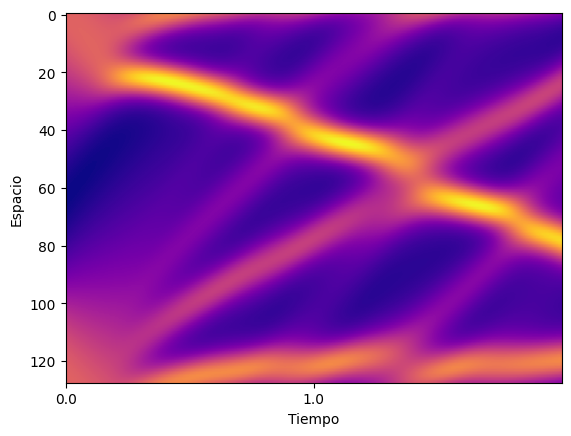

# Excito con diferentes solitones (condiciones iniciales).

In [ ]:
beta = 0.022
N = 128
dt = 5e-5
t_f = 10
step = int(t_f / dt) #los puntos
t = np.arange(step)*dt                      # Tiempo



x = np.linspace(0,2*np.pi,N,endpoint=True) # Coordenada espacial en [0,2*pi]
dx = x[1] - x[0]
k = np.arange(0,N/2+1)

In [ ]:
#Ploteo la condición inicial (solitón)
v_0 = 1
x_0 = x - (1/4) * np.pi
u_0 = 3*v_0*np.cosh(np.sqrt(((v_0*(4*beta)**(-1))))*(x_0 -v_0*0))**(-2)


plt.plot(x, u_0)
plt.title("Forma de solitón a tiempo inicial")
plt.xlabel("Tiempo")
plt.xlabel("Espacio")
plt.grid()
plt.show()

## KdV ##
u= u_0
dombeta(beta, dx, dt, N, step, k, u)

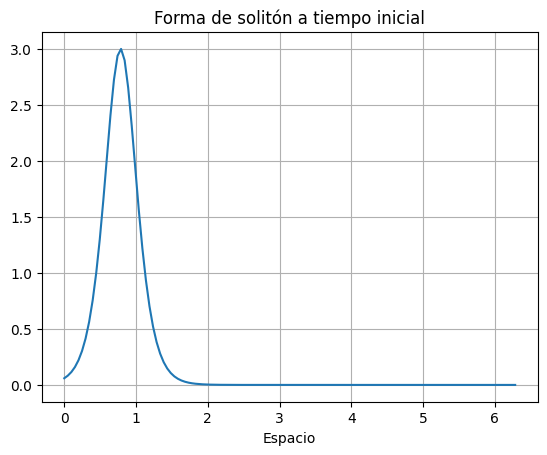

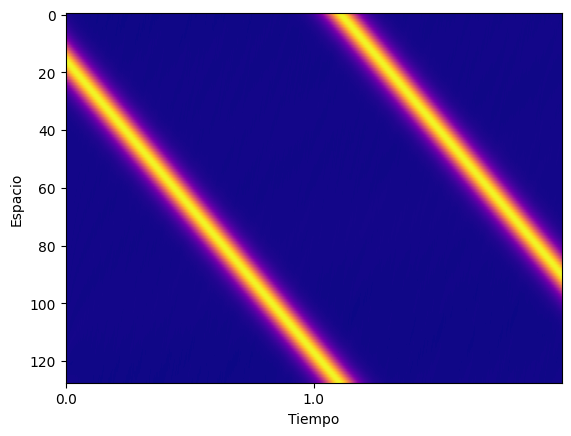

In [ ]:
for i in range(out.shape[1]):
  plt.plot(x, out[:,i])
  plt.grid(linestyle='--')
  plt.show()

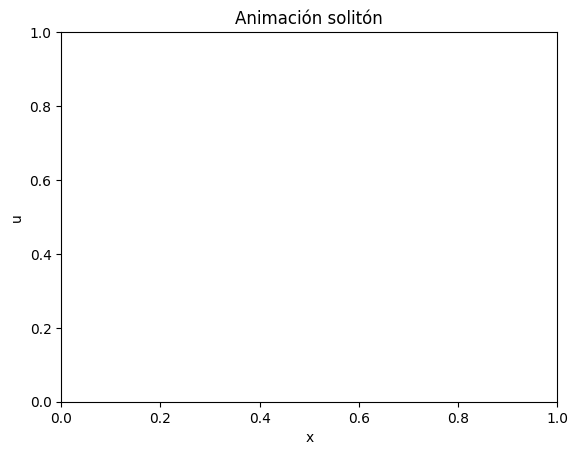

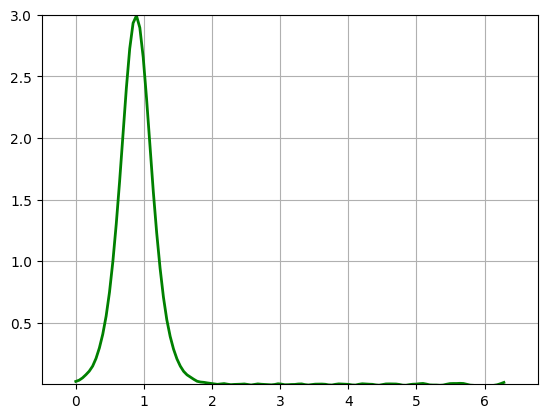

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

##Ejemplo de codigo para hacer animaciones, ver la documentación para más detalles
fig, ax = plt.subplots()

fig = plt.figure()
ax.set_title("Animación solitón")
ax.set_xlabel("x")
ax.set_ylabel("u")
axis = plt.axes(xlim =(-0.5, 6.78), ylim =(0.001, 3))
line, = axis.plot(x, np.sin(x), lw = 2, c='green')

def animate(i):
    line.set_ydata(out[:, i])
    return line,

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, frames=2000)

plt.grid(True)

HTML(ani.to_html5_video())

#Animación_01

En el caso de que la condición inicial sea un solitón podemos ver que se mantiene la forma y la velocidad. \\
Ahora veo si pasa lo mismo en tanto a más solitones (uno rápido y otro lento) como condición inicial. \\

In [ ]:
#Ploteo la condición inicial (solitones)
v_0 = 1
x_0 = x - (1/4) * np.pi
u_0 = 3*v_0*np.cosh(np.sqrt(((v_0*(4*beta)**(-1))))*(x_0 -v_0*0))**(-2)

v_1 = 10 # aumento un orden la velocidad
x_1 = x - (5/6) * np.pi
u_1 = 3*v_1*np.cosh(np.sqrt(((v_1*(4*beta)**(-1))))*(x_1 -v_1*0))**(-2)

u= u_0 + u_1

plt.plot(x, u_0)
plt.title(f"Forma de solitón lento a tiempo inicial, v = {v_0}")
plt.xlabel("Tiempo")
plt.xlabel("Espacio")
plt.grid()
plt.show()

plt.plot(x, u_1, c="red")
plt.title(f"Forma de solitón rápido a tiempo inicial, v = {v_1}")
plt.xlabel("Tiempo")
plt.xlabel("Espacio")
plt.grid()
plt.show()


plt.plot(x, u, c="red")
plt.title("Forma de solitones combinados a tiempo inicial")
plt.xlabel("Tiempo")
plt.xlabel("Espacio")
plt.grid()
plt.show()

## KdV ##
dombeta(beta, dx, dt, N, step, k, u)

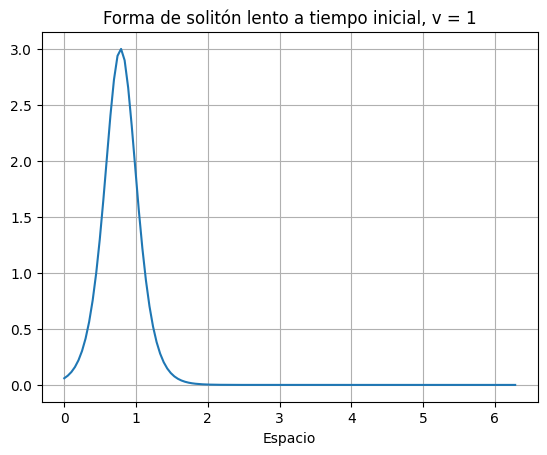

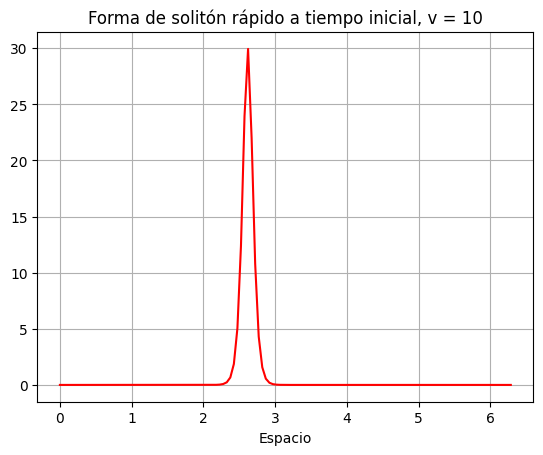

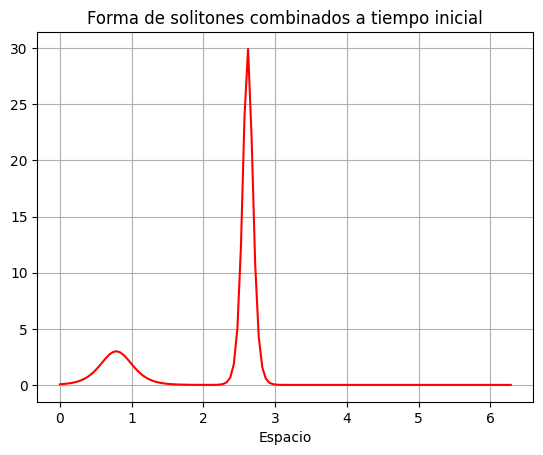

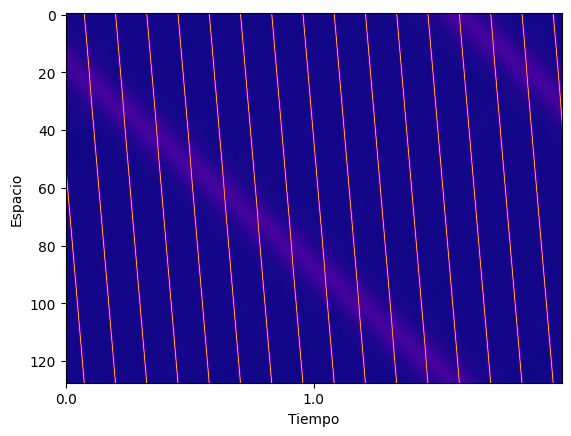

En el anterior gráfico podemos ver el solitón rápido con más velocidad de forma más demarcada (se puede apreciar como más cercano a la pantalla) y con más líneas debido a su frecuencia. Por otro lado tenemos en el fondo el lento, en este caso se aprecian dos líneas.

In [ ]:
for i in range(out.shape[1]):
  plt.plot(x, out[:,i])
  plt.grid(linestyle='--')
  plt.show()

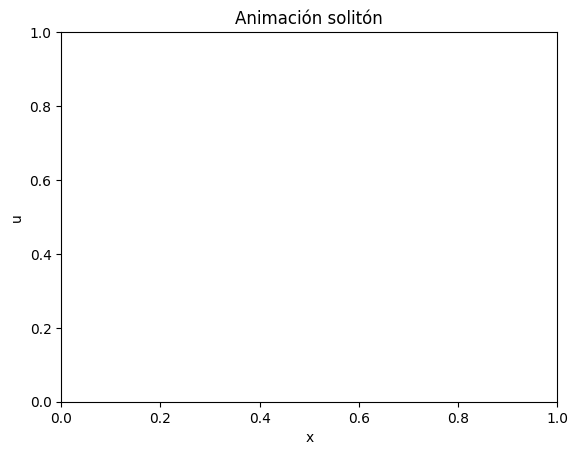

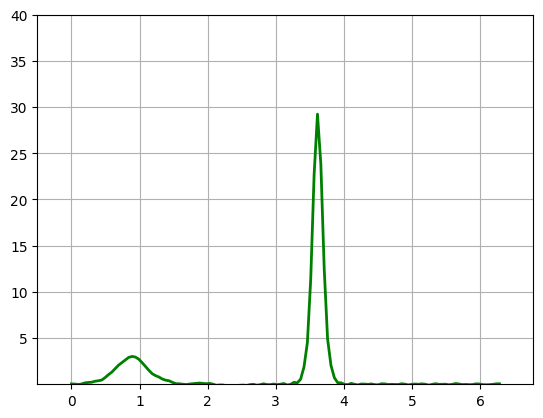

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

##Ejemplo de codigo para hacer animaciones, ver la documentación para más detalles
fig, ax = plt.subplots()

fig = plt.figure()
ax.set_title("Animación solitón")
ax.set_xlabel("x")
ax.set_ylabel("u")
axis = plt.axes(xlim =(-0.5, 6.78), ylim =(0.001, 40))
line, = axis.plot(x, np.sin(x), lw = 2, c='green')

def animate(i):
    line.set_ydata(out[:, i])
    return line,

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, frames=2000)

plt.grid(True)

HTML(ani.to_html5_video())

#Animación_02

In [ ]:
beta = 0.022
N = 128
dt = 5e-5
t_f = 50
step = int(t_f / dt) #los puntos
t = np.arange(step)*dt                      # Tiempo



x = np.linspace(0,2*np.pi,N,endpoint=True) # Coordenada espacial en [0,2*pi]
dx = x[1] - x[0]
k = np.arange(0,N/2+1)

In [ ]:
#Ploteo la condición inicial (solitones)
v_0 = 1
x_0 = x - (3/10) * np.pi
u_0 = 3*v_0*np.cosh(np.sqrt(((v_0*(4*beta)**(-1))))*(x_0 -v_0*0))**(-2)

v_1 = 5 # aumento un orden la velocidad
x_1 = x - (1/10) * np.pi
u_1 = 3*v_1*np.cosh(np.sqrt(((v_1*(4*beta)**(-1))))*(x_1 -v_1*0))**(-2)

u= u_0 + u_1

plt.plot(x, u_0)
plt.title(f"Forma de solitón lento a tiempo inicial, v = {v_0}")
plt.xlabel("Tiempo")
plt.xlabel("Espacio")
plt.grid()
plt.show()

plt.plot(x, u_1, c="red")
plt.title(f"Forma de solitón rápido a tiempo inicial, v = {v_1}")
plt.xlabel("Tiempo")
plt.xlabel("Espacio")
plt.grid()
plt.show()


plt.plot(x, u, c="red")
plt.title("Forma de solitones combinados a tiempo inicial")
plt.xlabel("Tiempo")
plt.xlabel("Espacio")
plt.grid()
plt.show()

## KdV ##
dombeta(beta, dx, dt, N, step, k, u)

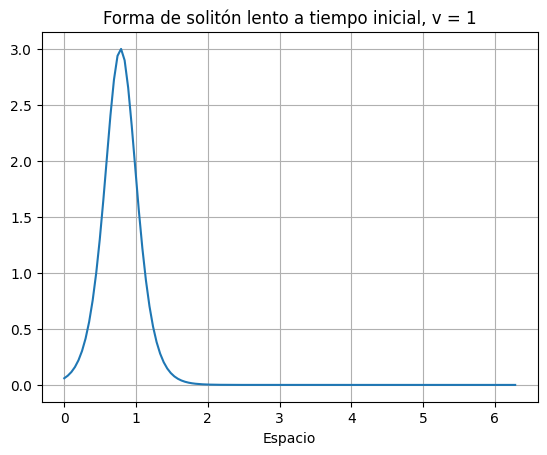

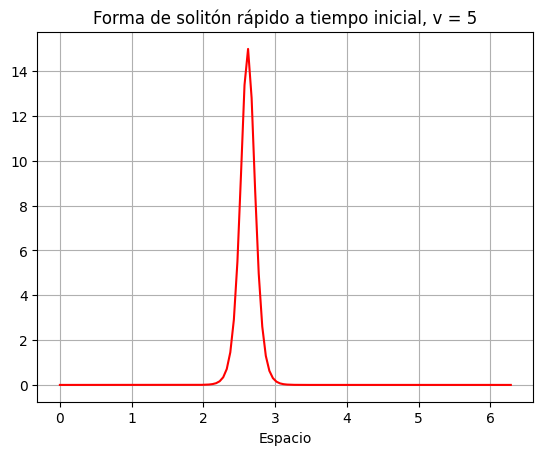

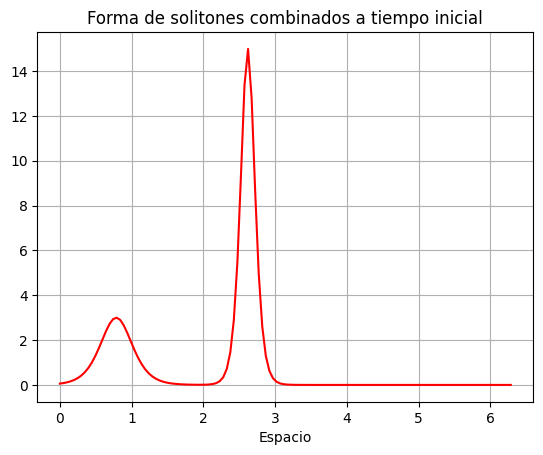

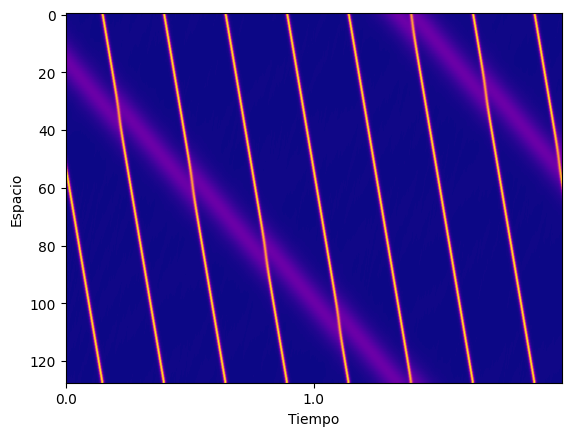

In [ ]:
for i in range(out.shape[1]):
  plt.plot(x, out[:,i])
  plt.grid(linestyle='--')
plt.show()

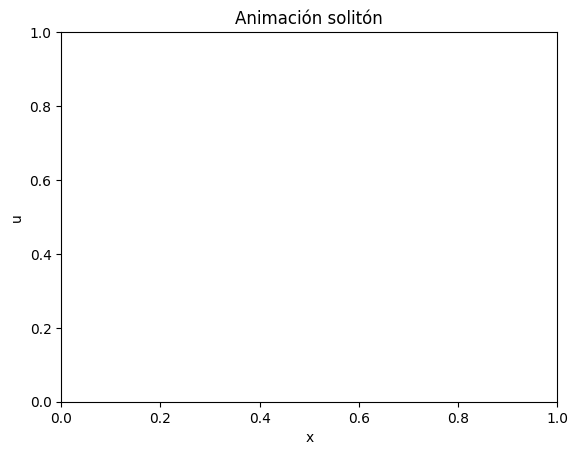

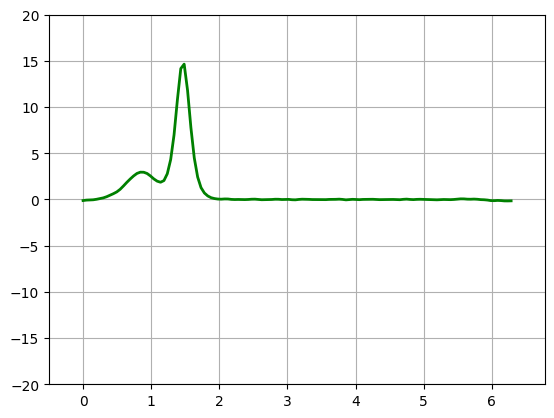

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

##Ejemplo de codigo para hacer animaciones, ver la documentación para más detalles
fig, ax = plt.subplots()

fig = plt.figure()
ax.set_title("Animación solitón")
ax.set_xlabel("x")
ax.set_ylabel("u")
axis = plt.axes(xlim =(-0.5, 6.78), ylim =(-20, 20))
line, = axis.plot(x, np.sin(x), lw = 2, c='green')

def animate(i):
    line.set_ydata(out[:, i])
    return line,

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, frames=4000)

plt.grid(True)

HTML(ani.to_html5_video())

#Animación_03

Al usar dos solitones se verán interacciones entre ellos en formas de choques. Esto se puede denotar en los graficos de profundidas en la intersección entre líneas de los solitones rápidos con los lentos. Estas interacciones/ intersecciones de líneas son los mencionados choques.

# Scattering inverso

Del método de scattering inverso se encuentra que usando la transformación

$$ u  = - 6 \beta \left( \lambda + \frac{\psi_{xx}}{\psi}\right)$$

entonces $u$ será una solución de KdV si $\psi$ es solución de la ecuación de Schrödinger con un potencial $V = \frac{-u}{6 \beta}$. Dado el potencial, los lugares donde hayan pozos representan la existencia de estados ligados y resultarán en la emisión de solitones.

In [ ]:
#Ploteo la condición inicial
A = 1
B = 1
u = A * np.sin(x* B)

beta = 0.022
N = 128
dt = 5e-5
t_f = 10
step = int(t_f / dt) #los puntos
t = np.arange(step)*dt                      # Tiempo


x = np.linspace(0,2*np.pi,N,endpoint=True) # Coordenada espacial en [0,2*pi]
dx = x[1] - x[0]
k = np.arange(0,N/2+1)


plt.plot(x, u, c="red")
plt.title("Condición inicial de Kdv")
plt.xlabel("Tiempo")
plt.xlabel("Espacio")
plt.grid()
plt.show()

## KdV ##
dombeta(beta, dx, dt, N, step, k, u)

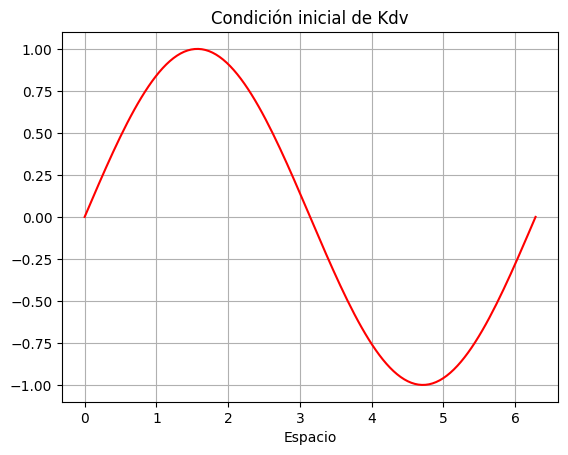

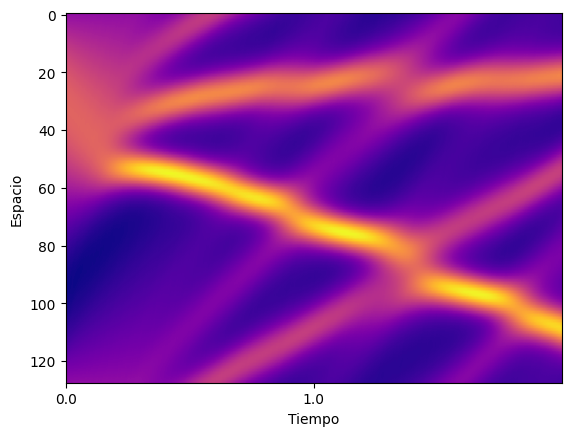

In [ ]:
#Calculo las conservaciones ()

def conservaciones(out, i):
  e = sum(out[:,i]*out[:,i])
  p = sum(out[:,i])
  return e, p

E = []
P = []

for i in range(step):
  E.append(conservaciones(out, i)[0])
  P.append(conservaciones(out, i)[1])

#Veo la variación de cantidades conservadas
plt.plot(t,E, c = "red")
plt.xlabel("Tiempo")
plt.ylabel("Energia")
deltaE = round((round(abs(E[-1] - E[0]), 4) / np.max(E)), 4)
plt.title(f"Conservación de la energía, variación: {deltaE} % (respecto a energía máxima)")
plt.grid()
plt.show()

plt.plot(t,P, c = "orange")
plt.xlabel("Tiempo")
plt.ylabel("Momento Lineal")
deltaP = round((round(abs(P[-1] - P[0])) / np.max(P)))
plt.title(f"Conservación del momento lineal, variación: {deltaP} % (respecto a momento máximo)")
plt.grid()
plt.show()

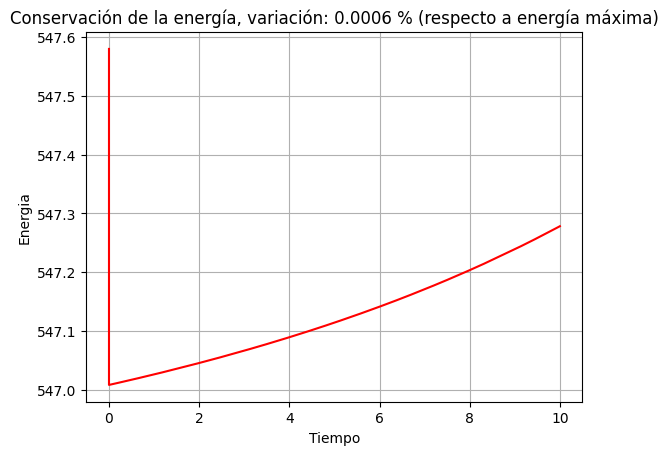

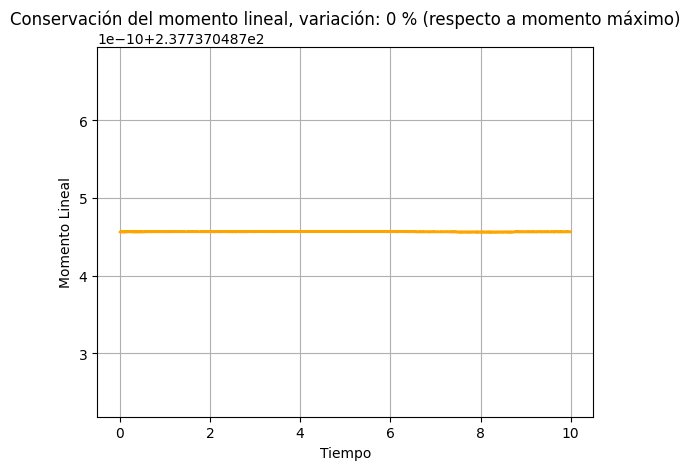

Ambos magnitudes, tanto energía como momento lineal, presentan una conservación en nuestro sistema debido a la mínima variación ( 𝚫E < 1% y 𝚫P ≈ 0). Estos últimos resultados coinciden con la calculado analíticamente en el primer inciso.